In [108]:
import numpy as np 
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import importlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import sys
sys.path.append("/home/aurelien.stumpf/Code/visualize_neural_network/")
import VisualizeNN as VisNN
sys.path.append("/home/aurelien.stumpf/Code/")
import deep_project_package.compute_procrustes as compute_procrustes
import deep_project_package.dataset as dataset
import deep_project_package.models as models
import deep_project_package.training as training
import deep_project_package.graph_metrics as graph_metrics

In [134]:
importlib.reload(dataset)
importlib.reload(models)
importlib.reload(training)
importlib.reload(VisNN)
importlib.reload(compute_procrustes)
importlib.reload(graph_metrics)

<module 'deep_project_package.graph_metrics' from '/home/aurelien.stumpf/Code/deep_project_package/graph_metrics.py'>

## Loading dataset

In [23]:
#synthetic function 
def f(x,d):
    return np.sum(x,axis=1)**d

In [90]:
X = np.random.uniform(-3, 3, (10000, 4))
y = f(x=X, d=1)

In [91]:
#normalizer = Normalizer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
#X_train = normalizer.fit_transform(X_train)
X_test = torch.tensor(X_test, dtype=torch.float32)
#X_test = normalizer.transform(X_test)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [92]:
trainset = dataset.Dataset(X_train, y_train)
testset = dataset.Dataset(X_test, y_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=True)

## Training

In [93]:
layer_sizes_list = [4, 30, 30, 30, 1]

model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier_uniform', type="regression")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = torch.nn.MSELoss() #torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=20, verbose=True, factor=0.5)
training.train_model(model, trainloader, testloader, device, criterion, 300, optimizer, scheduler=scheduler,type="regression",save=True,folder_name="mlp_model_1")

Epoch 0:  62%|██████▎   | 10/16 [00:00<00:00, 93.22batch/s, loss=0.00774]

Epoch 0: 100%|██████████| 16/16 [00:00<00:00, 95.30batch/s, loss=0.0085] 


Epoch 0
lr:  0.01
-------------------------
Test set: Avg. loss: 1.7396
-------------------------


Epoch 10: 100%|██████████| 16/16 [00:00<00:00, 107.89batch/s, loss=7.29e-6]


Epoch 10
lr:  0.01
-------------------------
Test set: Avg. loss: 0.0145
-------------------------


Epoch 20: 100%|██████████| 16/16 [00:00<00:00, 108.02batch/s, loss=2.29e-6]


Epoch 20
lr:  0.01
-------------------------
Test set: Avg. loss: 0.0049
-------------------------


Epoch 30: 100%|██████████| 16/16 [00:00<00:00, 127.71batch/s, loss=1.35e-6]


Epoch 30
lr:  0.01
-------------------------
Test set: Avg. loss: 0.0029
-------------------------


Epoch 40: 100%|██████████| 16/16 [00:00<00:00, 127.59batch/s, loss=1.17e-6]


Epoch 40
lr:  0.01
-------------------------
Test set: Avg. loss: 0.0016
-------------------------


Epoch 50: 100%|██████████| 16/16 [00:00<00:00, 127.36batch/s, loss=9.79e-7]


Epoch 50
lr:  0.01
-------------------------
Test set: Avg. loss: 0.0028
-------------------------


Epoch 60: 100%|██████████| 16/16 [00:00<00:00, 114.23batch/s, loss=6.2e-7] 


Epoch 60
lr:  0.01
-------------------------
Test set: Avg. loss: 0.0010
-------------------------


Epoch 70: 100%|██████████| 16/16 [00:00<00:00, 125.65batch/s, loss=2.05e-6]


Epoch 70
lr:  0.01
-------------------------
Test set: Avg. loss: 0.0025
-------------------------


Epoch 80: 100%|██████████| 16/16 [00:00<00:00, 126.89batch/s, loss=9.91e-7]


Epoch 80
lr:  0.01
-------------------------
Test set: Avg. loss: 0.0025
-------------------------


Epoch 90: 100%|██████████| 16/16 [00:00<00:00, 124.06batch/s, loss=6.08e-7]


Epoch 90
lr:  0.005
-------------------------
Test set: Avg. loss: 0.0009
-------------------------


Epoch 100: 100%|██████████| 16/16 [00:00<00:00, 127.72batch/s, loss=3.66e-7]


Epoch 100
lr:  0.005
-------------------------
Test set: Avg. loss: 0.0007
-------------------------


Epoch 110: 100%|██████████| 16/16 [00:00<00:00, 126.60batch/s, loss=4.29e-7]


Epoch 110
lr:  0.005
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 120: 100%|██████████| 16/16 [00:00<00:00, 128.12batch/s, loss=2.74e-7]


Epoch 120
lr:  0.005
-------------------------
Test set: Avg. loss: 0.0013
-------------------------


Epoch 130: 100%|██████████| 16/16 [00:00<00:00, 127.92batch/s, loss=5.73e-7]


Epoch 130
lr:  0.005
-------------------------
Test set: Avg. loss: 0.0030
-------------------------


Epoch 140: 100%|██████████| 16/16 [00:00<00:00, 127.31batch/s, loss=3.84e-7]


Epoch 140
lr:  0.005
-------------------------
Test set: Avg. loss: 0.0010
-------------------------


Epoch 150: 100%|██████████| 16/16 [00:00<00:00, 127.49batch/s, loss=3.23e-7]


Epoch 150
lr:  0.0025
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 160: 100%|██████████| 16/16 [00:00<00:00, 129.06batch/s, loss=3.76e-7]


Epoch 160
lr:  0.0025
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 170: 100%|██████████| 16/16 [00:00<00:00, 45.30batch/s, loss=3.47e-7]


Epoch 170
lr:  0.00125
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 180: 100%|██████████| 16/16 [00:00<00:00, 112.68batch/s, loss=3.62e-7]


Epoch 180
lr:  0.00125
-------------------------
Test set: Avg. loss: 0.0009
-------------------------


Epoch 190: 100%|██████████| 16/16 [00:00<00:00, 123.09batch/s, loss=3.4e-7] 


Epoch 190
lr:  0.000625
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 200: 100%|██████████| 16/16 [00:00<00:00, 125.39batch/s, loss=3.74e-7]


Epoch 200
lr:  0.000625
-------------------------
Test set: Avg. loss: 0.0009
-------------------------


Epoch 210: 100%|██████████| 16/16 [00:00<00:00, 126.20batch/s, loss=3.33e-7]


Epoch 210
lr:  0.0003125
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 220: 100%|██████████| 16/16 [00:00<00:00, 126.42batch/s, loss=3.33e-7]


Epoch 220
lr:  0.0003125
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 230: 100%|██████████| 16/16 [00:00<00:00, 127.94batch/s, loss=3.33e-7]


Epoch 230
lr:  0.00015625
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 240: 100%|██████████| 16/16 [00:00<00:00, 112.98batch/s, loss=3.29e-7]


Epoch 240
lr:  0.00015625
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 250: 100%|██████████| 16/16 [00:00<00:00, 126.78batch/s, loss=3.27e-7]


Epoch 250
lr:  7.8125e-05
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 260: 100%|██████████| 16/16 [00:00<00:00, 121.51batch/s, loss=3.3e-7] 


Epoch 260
lr:  7.8125e-05
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 270: 100%|██████████| 16/16 [00:00<00:00, 129.84batch/s, loss=3.26e-7]


Epoch 270
lr:  3.90625e-05
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 280: 100%|██████████| 16/16 [00:00<00:00, 129.93batch/s, loss=3.21e-7]


Epoch 280
lr:  3.90625e-05
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 290: 100%|██████████| 16/16 [00:00<00:00, 121.23batch/s, loss=3.2e-7] 


Epoch 290
lr:  1.953125e-05
-------------------------
Test set: Avg. loss: 0.0008
-------------------------


Epoch 299: 100%|██████████| 16/16 [00:00<00:00, 127.56batch/s, loss=3.34e-7]


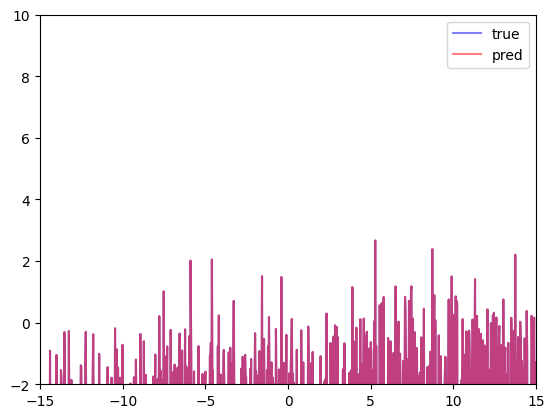

In [97]:
tab = np.concatenate([np.linspace(-1,1,1000).reshape(-1,1),np.random.normal(-1,1,(1000,3))], axis=1)
#tab = np.concatenate([np.linspace(-15,15,1000).reshape(-1,1)], axis=1)
y_true = f(tab, 1)
tab = torch.tensor(tab, dtype=torch.float32)
tab = tab.to(device)
model.eval()
pred = model(tab).detach().cpu().numpy()
plt.plot(np.linspace(-15,15,1000), y_true, label='true', color='blue', alpha=0.5)
plt.plot(np.linspace(-15,15,1000), pred, label='pred', color='red', alpha=0.5)
plt.xlim(-15,15)
plt.ylim(-2,10)
plt.legend()
plt.show()

## Visualization 

In [135]:
li_corr = graph_metrics.redundancy(model)

l1.weight


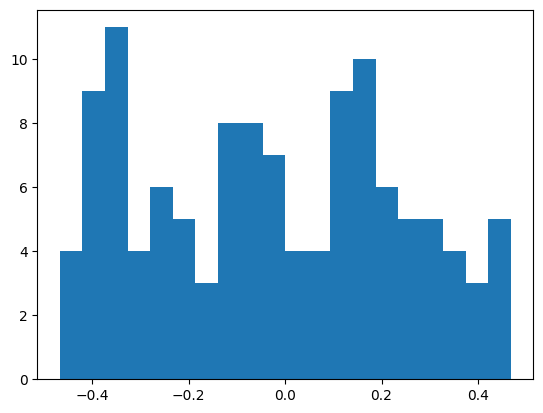

l1.weight


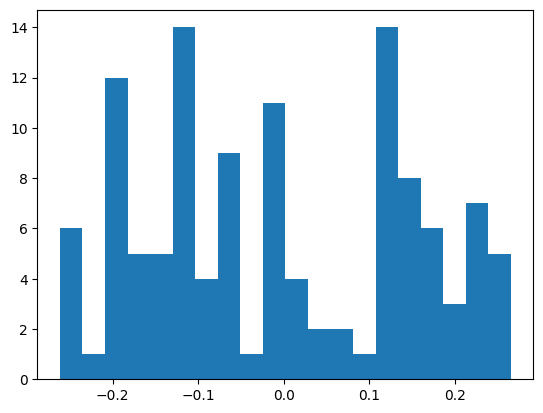

l1.weight


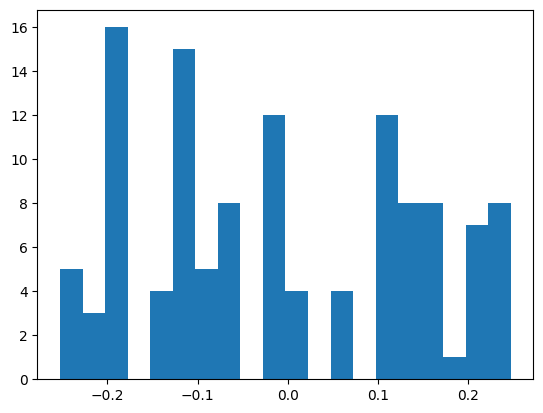

In [100]:
folder_path = "./model_weights/mlp_model_1/"
model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier_uniform', type="regression")
for epoch in range(0,300,100):
    model.load_state_dict(torch.load(folder_path + "/model_{}.pt".format(epoch)))
    for layer in model.named_parameters():
        weights = layer[1].data.cpu().numpy()
        print(f'{layer[0]}')
        plt.hist(weights.flatten(), bins=20)
        plt.show()
        break

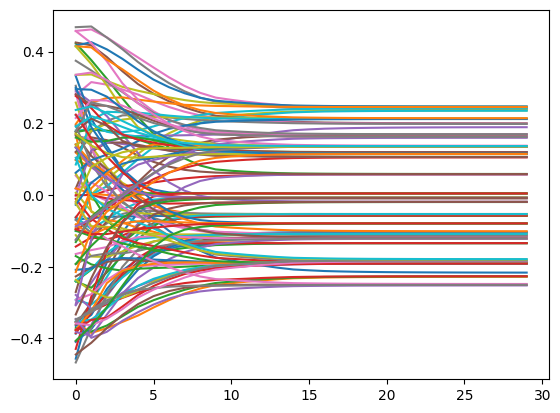

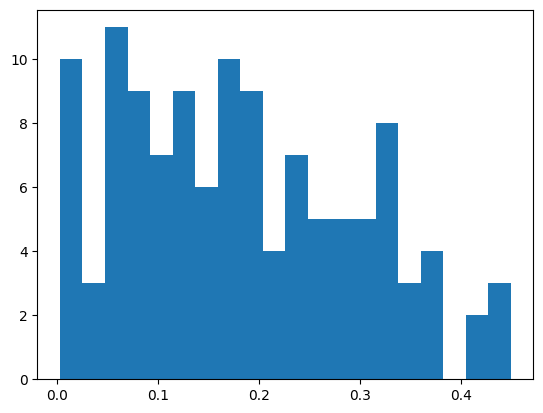

In [102]:
folder_path = "./model_weights/mlp_model_1/"
model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier_uniform', type="regression")
list_weights = np.zeros((len(range(0,300,10)),30,4))
for epoch in range(0,300,10):
    model.load_state_dict(torch.load(folder_path + "/model_{}.pt".format(epoch)))
    for layer in model.named_parameters():
        weights = layer[1].data.cpu().numpy()
        list_weights[epoch//10] = weights   
        break

for i in range(30):
    for j in range(4):
        plt.plot(list_weights[:,i,j].flatten())
plt.show()

weight_diff = np.abs(list_weights[-1,:,:] - list_weights[0,:,:])
plt.hist(weight_diff.flatten(), bins=20)    
plt.show()

l1.weight


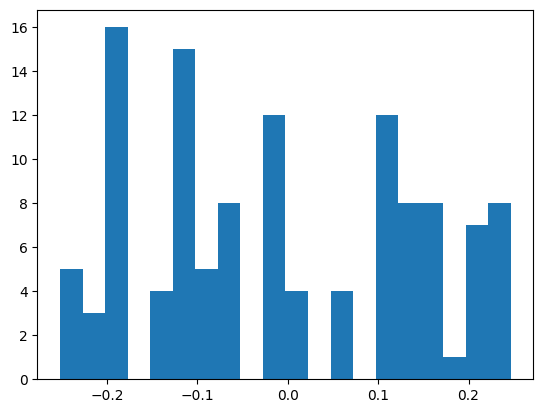

l1.weight


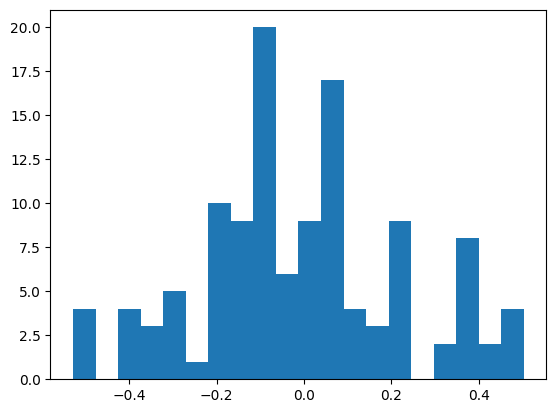

l1.weight


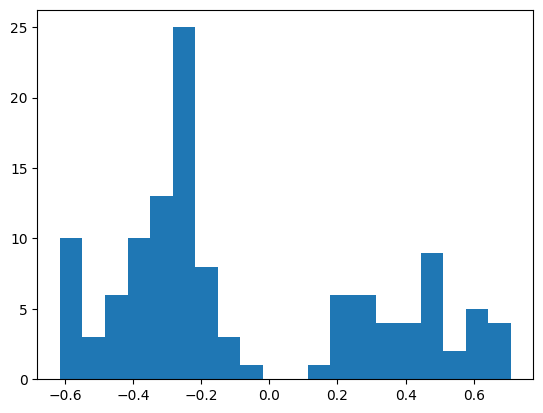

l1.weight


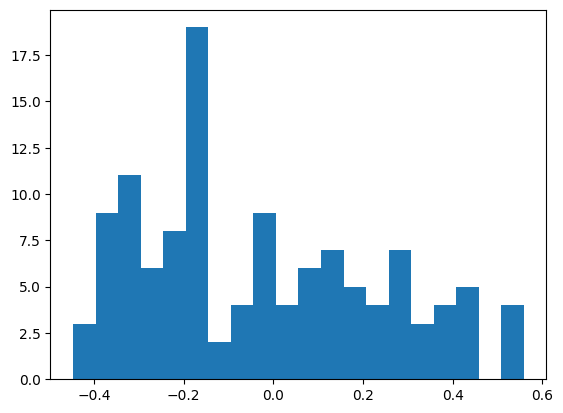

In [104]:
for degree in [1,2,3,4]:
    folder_path = "./model_weights/mlp_model_{}/".format(degree)
    model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier_uniform', type="regression")
    epoch = 290
    model.load_state_dict(torch.load(folder_path + "/model_{}.pt".format(epoch)))
    for layer in model.named_parameters():
        weights = layer[1].data.cpu().numpy()
        print(f'{layer[0]}')
        plt.hist(weights.flatten(), bins=20)
        plt.show()
        break

1


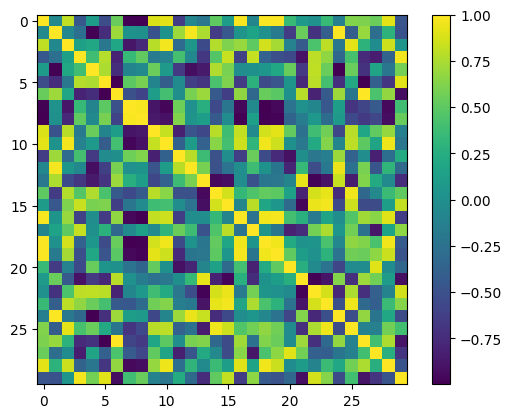

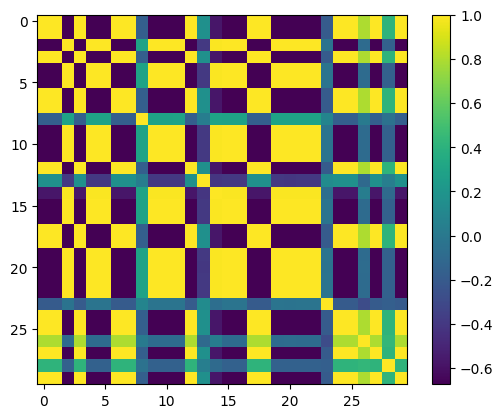

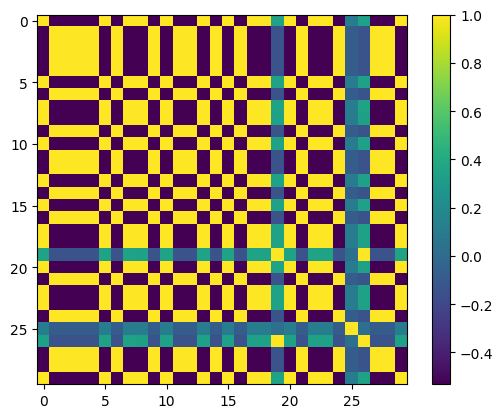

2


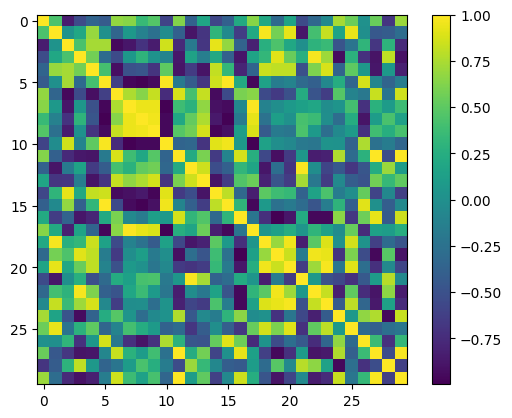

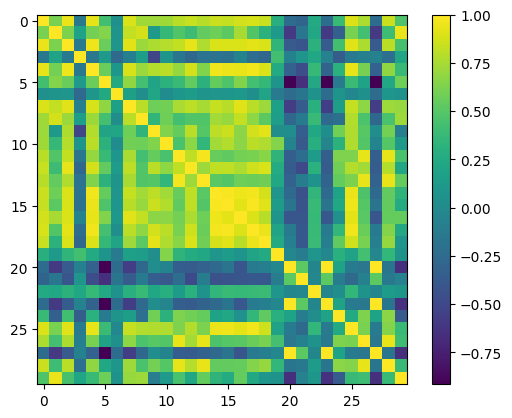

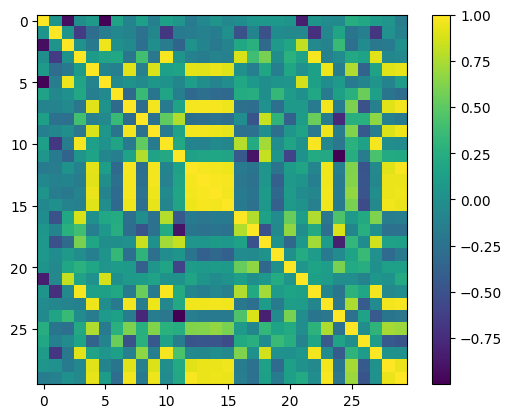

3


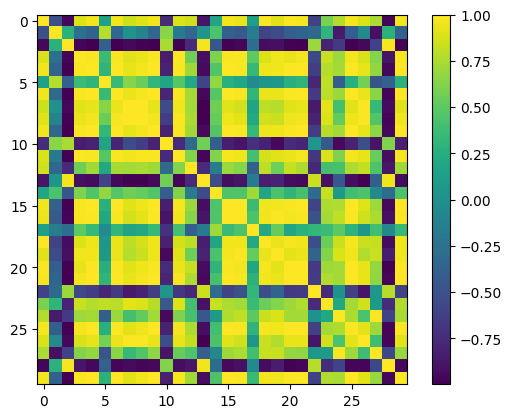

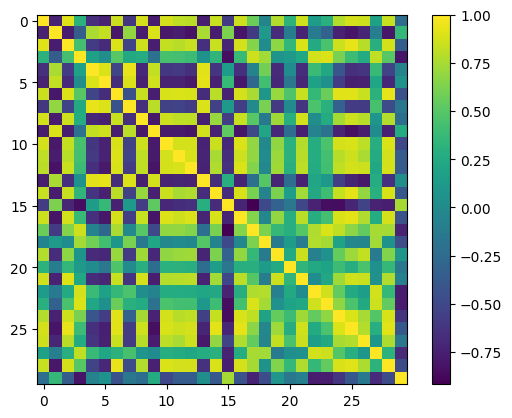

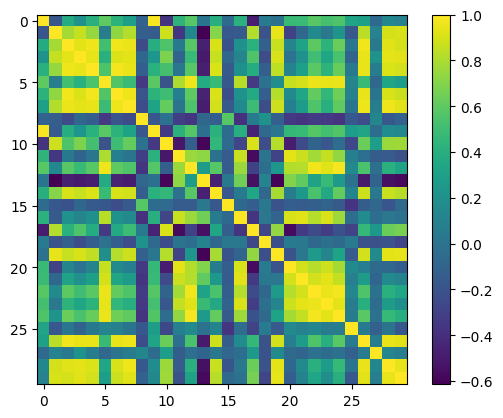

4


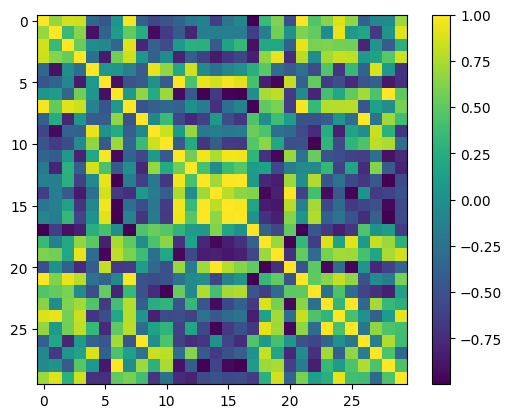

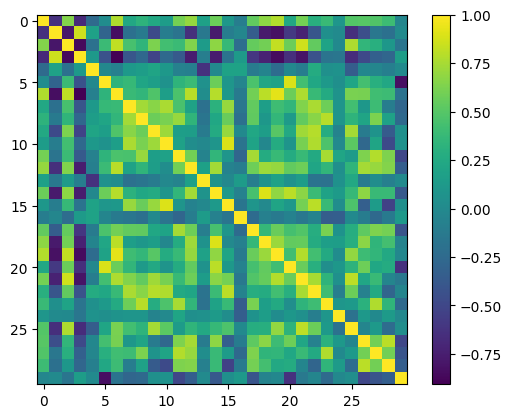

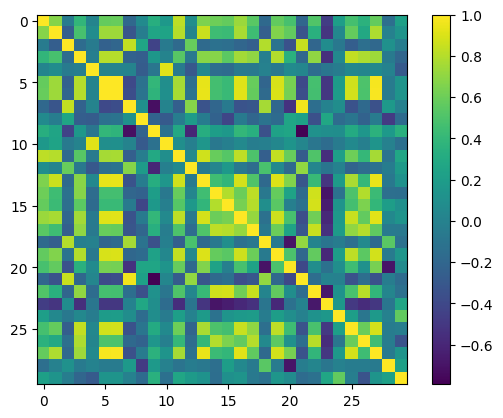

In [138]:
for degree in [1,2,3,4]:
    folder_path = "./model_weights/mlp_model_{}/".format(degree)
    model = models.Model_MLP(layer_sizes_list, non_linearity="relu", initial_weights='xavier_uniform', type="regression")
    epoch = 290
    model.load_state_dict(torch.load(folder_path + "/model_{}.pt".format(epoch)))
    print(degree)
    li_corr = graph_metrics.redundancy(model)
    for i in range(len(li_corr)):
        plt.imshow(li_corr[i])
        plt.colorbar()
        plt.show()

l1.weight


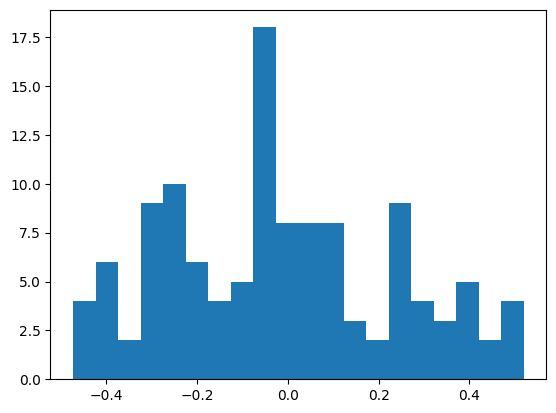

l1.bias


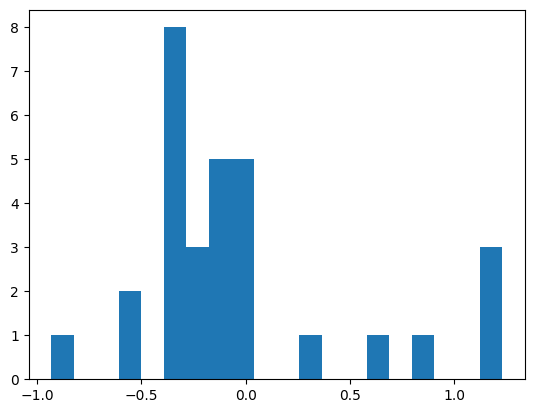

l2.weight


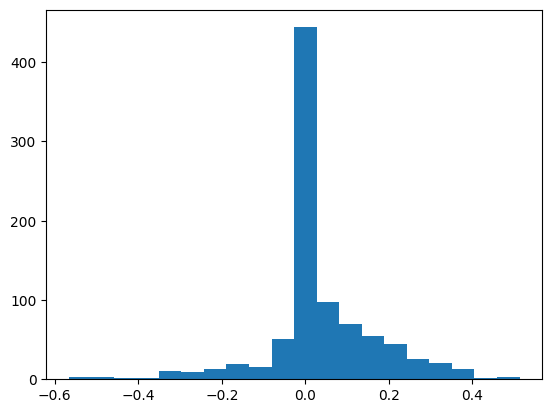

l2.bias


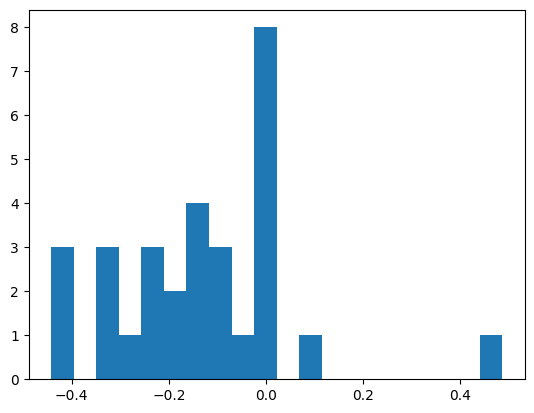

l3.weight


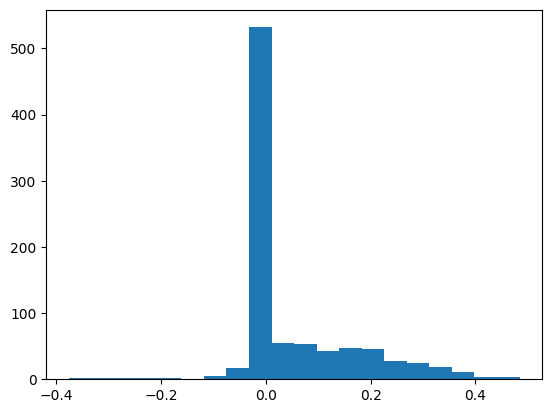

l3.bias


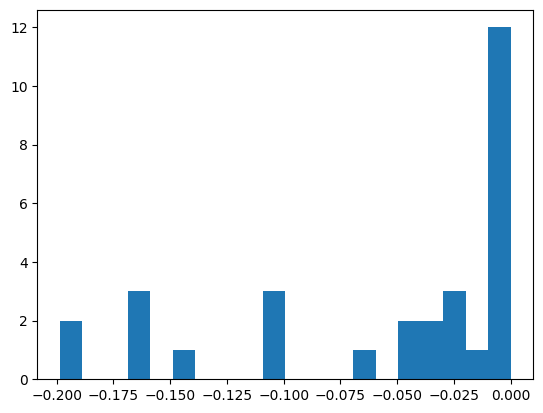

l4.weight


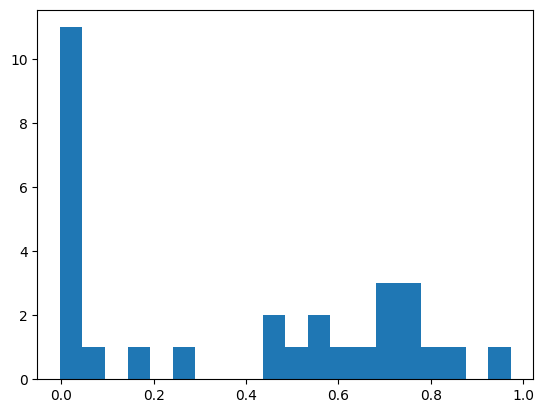

l4.bias


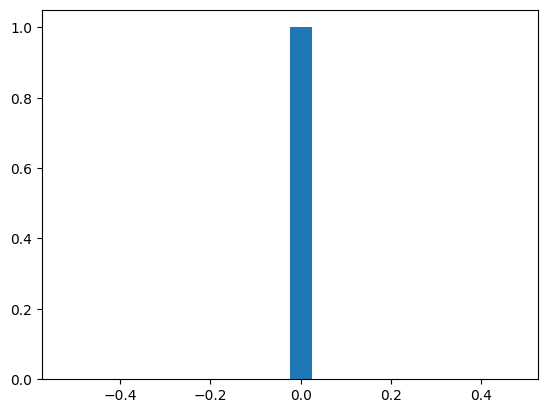

In [39]:
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    print(f'{layer[0]}')
    plt.hist(weights.flatten(), bins=20)
    plt.show()

layer0
degree_out


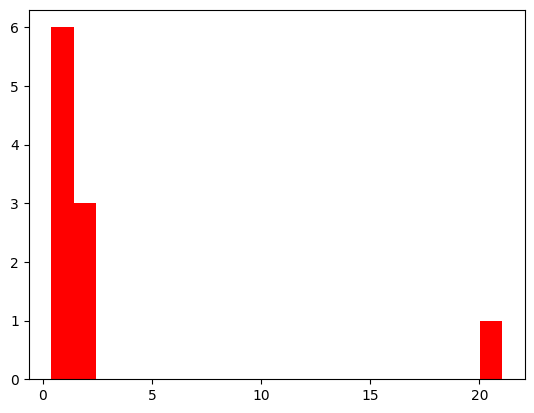

layer1
degree_in


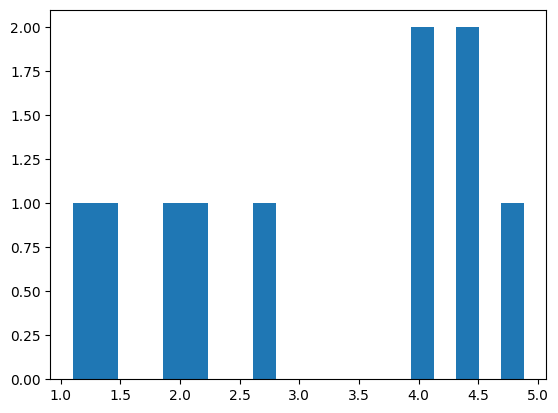

degree_out


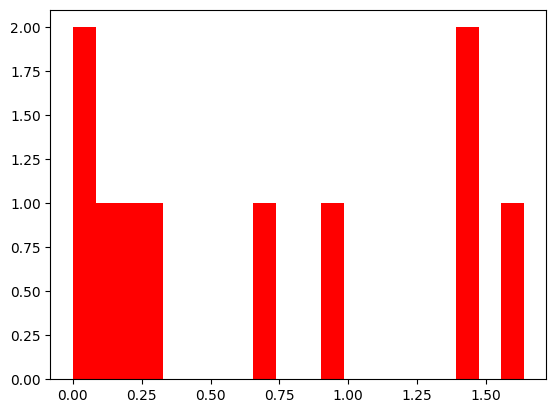

layer2
degree_in


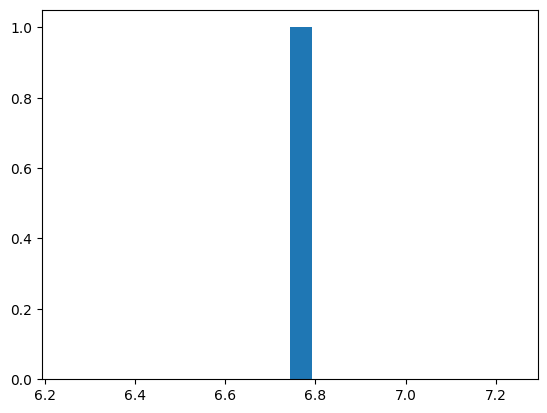

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        degree_out = np.sum(np.abs(weights), axis=0)
        print("degree_out")
        plt.hist(degree_out, bins=20, color='red')
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in = np.sum(np.abs(weights), axis=1)
        plt.hist(degree_in, bins=20)
        plt.show()

layer0
degree_out


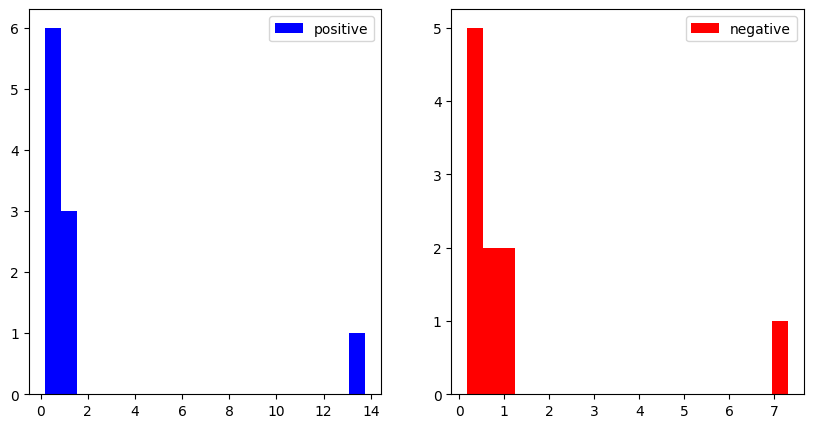

layer1
degree_in


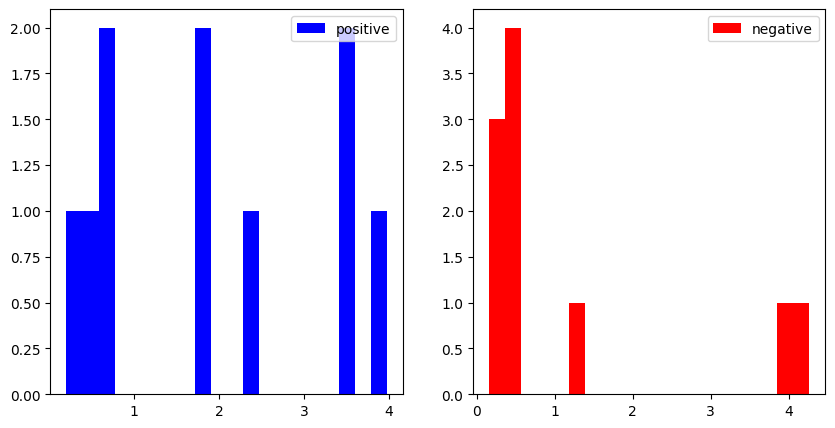

degree_out


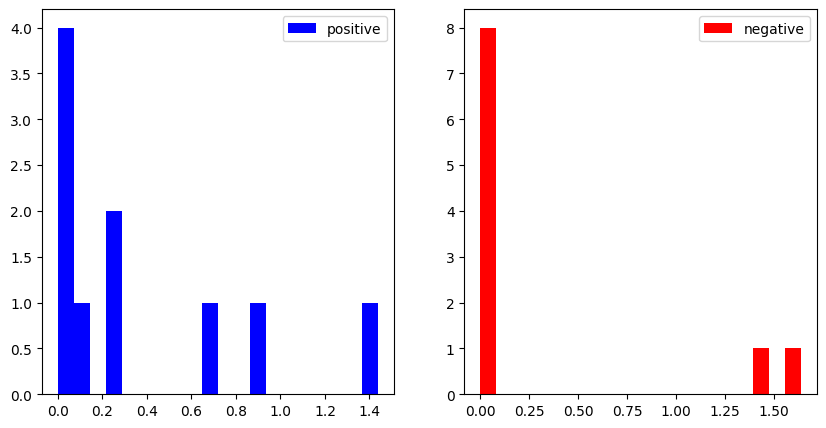

layer2
degree_in


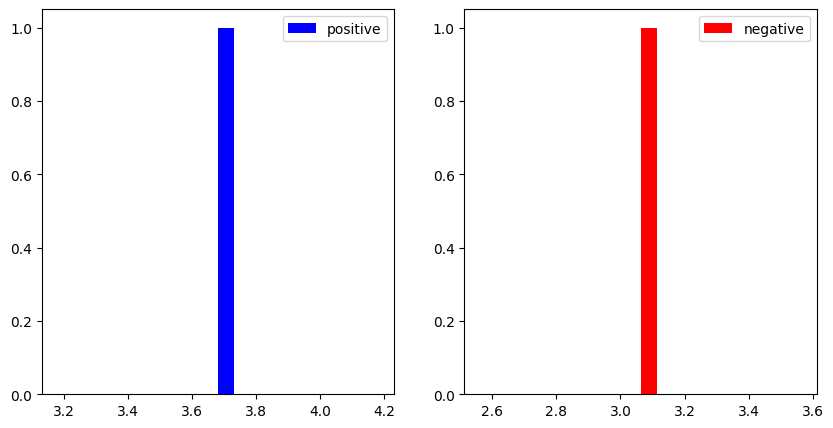

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        neg_weights = np.copy(weights)
        neg_weights[neg_weights > 0] = 0
        pos_weights = np.copy(weights)
        pos_weights[pos_weights < 0] = 0
        if i == 0:
            print("layer{}".format(i))
        print("degree_out")
        degree_out_neg = np.sum(np.abs(neg_weights), axis=0)
        degree_out_pos = np.sum(np.abs(pos_weights), axis=0)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(degree_out_pos, bins=20, color='blue')
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.hist(degree_out_neg, bins=20, color='red')
        plt.legend(['negative'])
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in_neg = np.sum(np.abs(neg_weights), axis=1)
        degree_in_pos = np.sum(np.abs(pos_weights), axis=1)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(degree_in_pos, bins=20, color='blue')
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.hist(degree_in_neg, bins=20, color='red')
        plt.legend(['negative'])
        plt.show()

layer0
degree_out


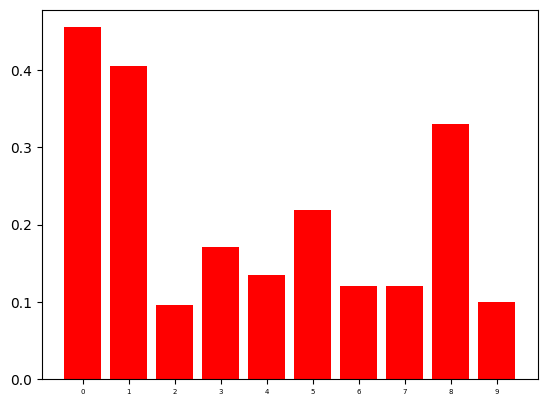

layer1
degree_in


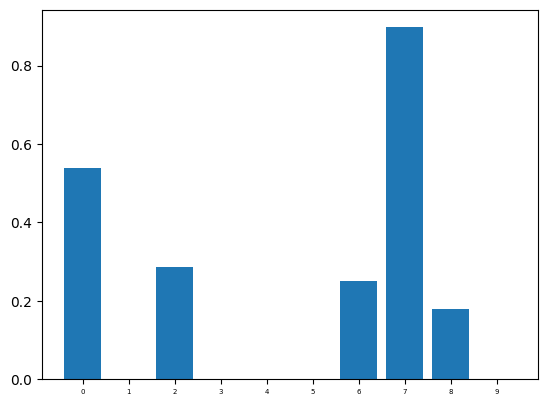

degree_out


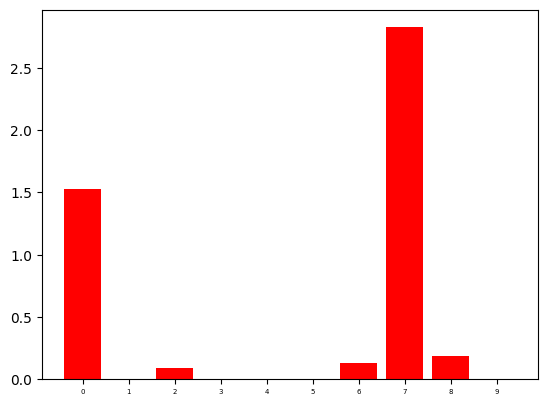

layer2
degree_in


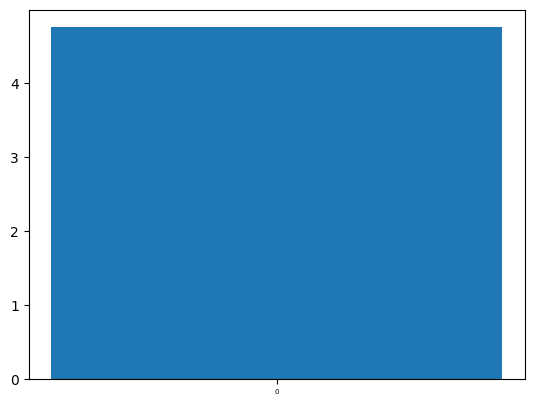

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        degree_out = np.sum(np.abs(weights), axis=0)
        print("degree_out")
        plt.bar(np.arange(weights.shape[1]),degree_out, color='red')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in = np.sum(np.abs(weights), axis=1)
        plt.bar(np.arange(weights.shape[0]),degree_in)
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.show()

layer0
degree_out


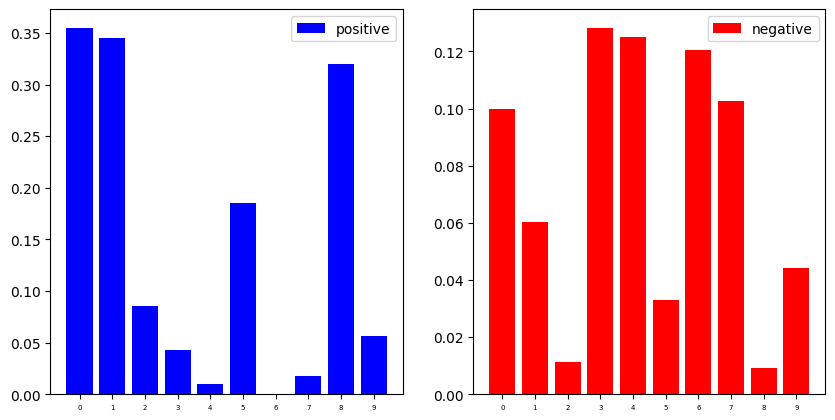

layer1
degree_in


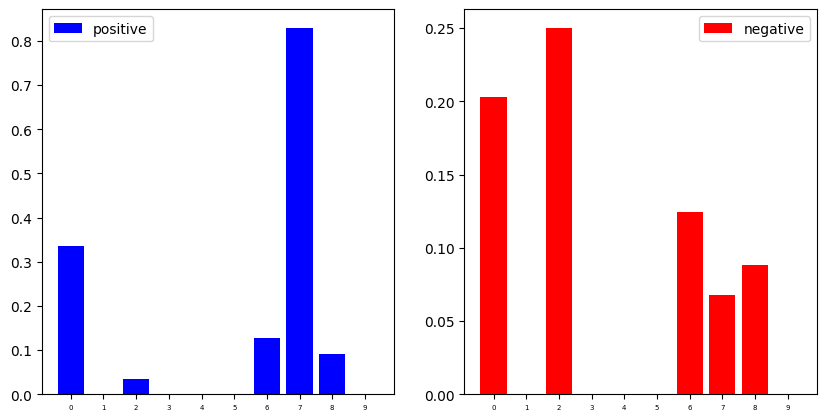

degree_out


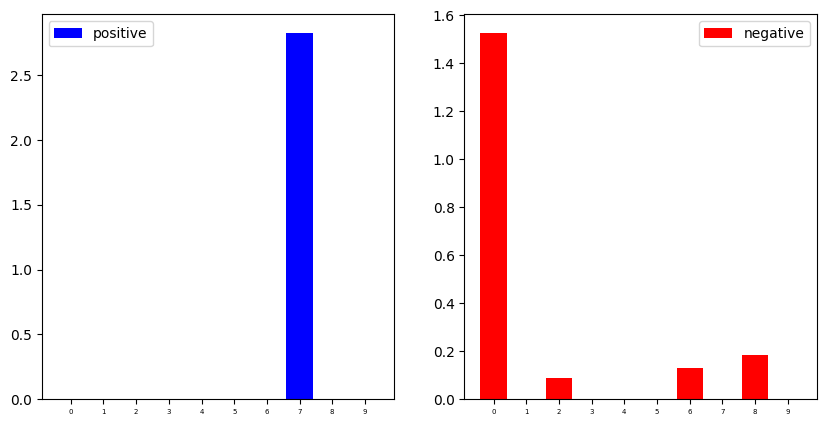

layer2
degree_in


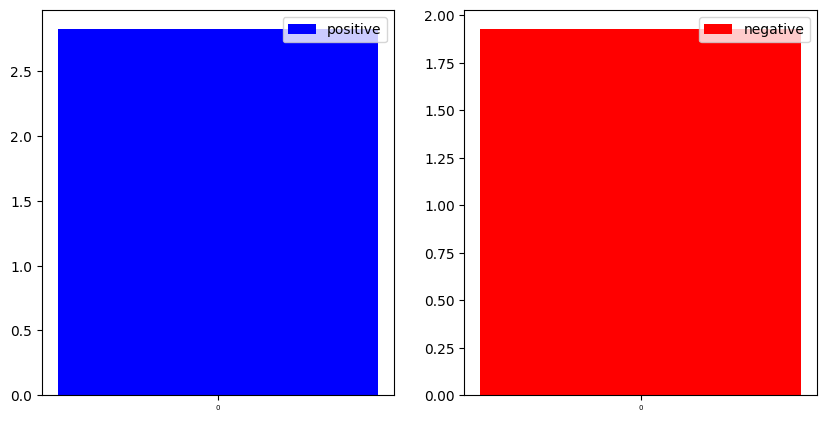

In [ ]:
i=0
for layer in model.named_parameters():
    weights = layer[1].data.cpu().numpy()
    if len(weights.shape) > 1:
        if i == 0:
            print("layer{}".format(i))
        neg_weights = np.copy(weights)
        neg_weights[neg_weights > 0] = 0
        pos_weights = np.copy(weights)
        pos_weights[pos_weights < 0] = 0
        print("degree_out")
        degree_out_neg = np.sum(np.abs(neg_weights), axis=0)
        degree_out_pos = np.sum(np.abs(pos_weights), axis=0)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.bar(np.arange(weights.shape[1]),degree_out_pos, color='blue')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.bar(np.arange(weights.shape[1]),degree_out_neg, color='red')
        plt.xticks(np.arange(weights.shape[1]), rotation=0, fontsize=5)
        plt.legend(['negative'])
        plt.show()
        i += 1
        if i > 0:
            print("layer{}".format(i))
        print("degree_in")
        degree_in_neg = np.sum(np.abs(neg_weights), axis=1)
        degree_in_pos = np.sum(np.abs(pos_weights), axis=1)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.bar(np.arange(weights.shape[0]),degree_in_pos, color='blue')
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.legend(['positive'])
        plt.subplot(1,2,2)
        plt.bar(np.arange(weights.shape[0]),degree_in_neg, color='red')
        plt.xticks(np.arange(weights.shape[0]), rotation=0, fontsize=5)
        plt.legend(['negative'])
        plt.show()

# Visualization

In [74]:
def get_model_params(model):
    params = []
    for layer in model.named_parameters():
        if "weight" in layer[0]:
            params.append(layer[1].cpu().detach().numpy().T)
    return params

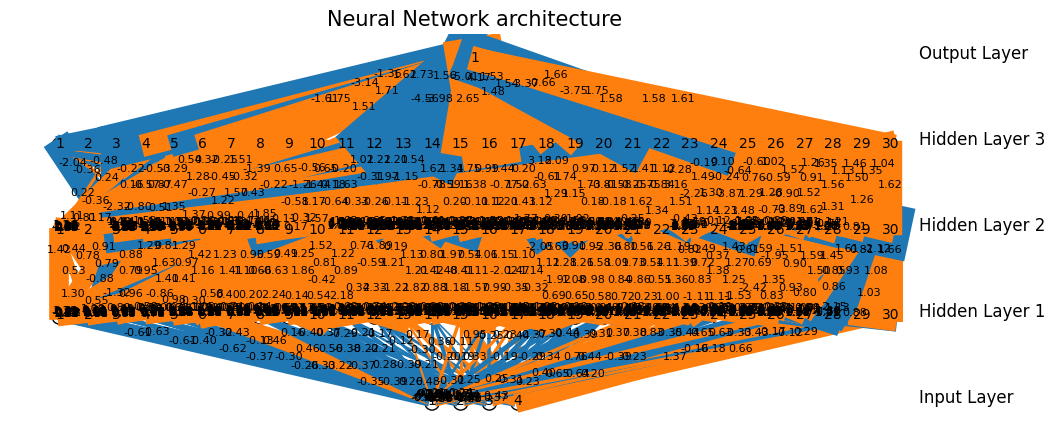

In [75]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.1, 10)
network.draw()

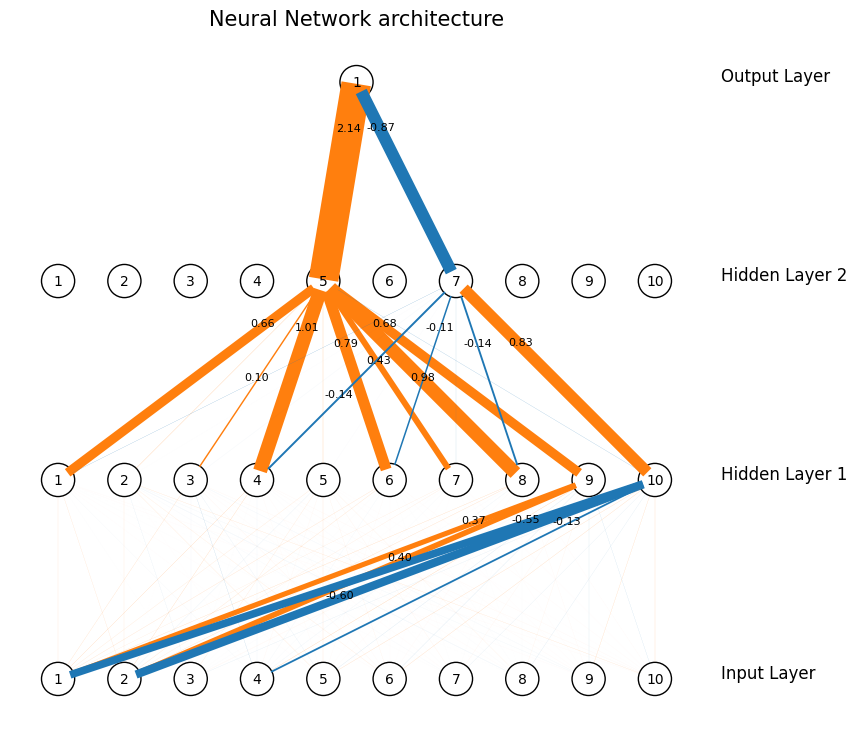

In [92]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.1, 10)
network.draw()

In [32]:
for layer in model.named_parameters():
    W = layer[1].data.cpu().numpy()
    print(W @ W.T)

[[ 2.4870118e-01  1.2936613e-09  5.2880034e-11  4.7473145e-09
  -2.1863642e-09 -2.2504105e-09  5.5440874e-09 -4.6639248e-11
  -8.4105523e-10 -6.2615393e-09]
 [ 1.2936613e-09  2.1619324e-01 -2.7838289e-09  5.4318821e-09
   2.9860516e-09 -6.4033107e-10 -5.9874661e-09 -6.0618013e-09
   6.9330497e-10 -7.4380846e-10]
 [ 5.2880034e-11 -2.7838289e-09  1.8004459e-01  3.2951406e-09
  -4.4646438e-09 -1.3156443e-09  4.4166901e-09 -3.0538512e-09
   2.2356517e-09 -1.7901258e-10]
 [ 4.7473145e-09  5.4318821e-09  3.2951406e-09  3.2979512e-01
  -8.4235996e-10 -2.5191693e-09  1.6863151e-09  4.9959072e-09
   1.2487362e-09 -3.1719682e-09]
 [-2.1863642e-09  2.9860516e-09 -4.4646438e-09 -8.4235996e-10
   3.4401336e-01  2.2257782e-09  3.7707815e-09 -2.8192617e-09
   2.8701379e-09  1.6097702e-10]
 [-2.2504105e-09 -6.4033107e-10 -1.3156443e-09 -2.5191693e-09
   2.2257782e-09  2.2611775e-02  2.2051341e-09  3.1081854e-10
   8.9528385e-10 -5.5898164e-10]
 [ 5.5440874e-09 -5.9874661e-09  4.4166901e-09  1.6863151e

In [ ]:
importlib.reload(compute_procrustes)
from scipy.stats import ortho_group

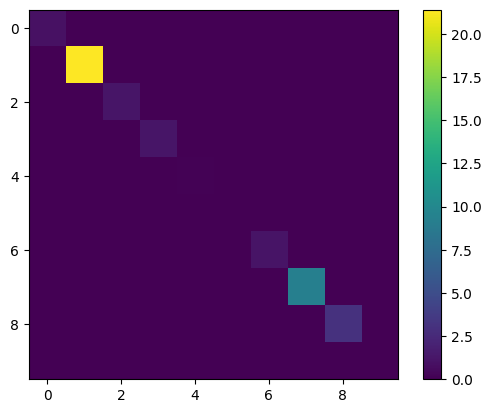

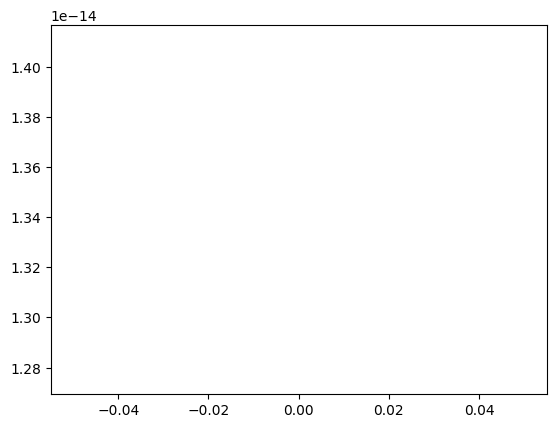

In [ ]:
W = ortho_group.rvs(10) @ np.diag(np.random.normal(0, 1, 10)**2)
A,li = compute_procrustes.compute_procrustes(W)
plt.imshow(A.T @ A)
plt.colorbar()
plt.show()
plt.plot(li[:10])

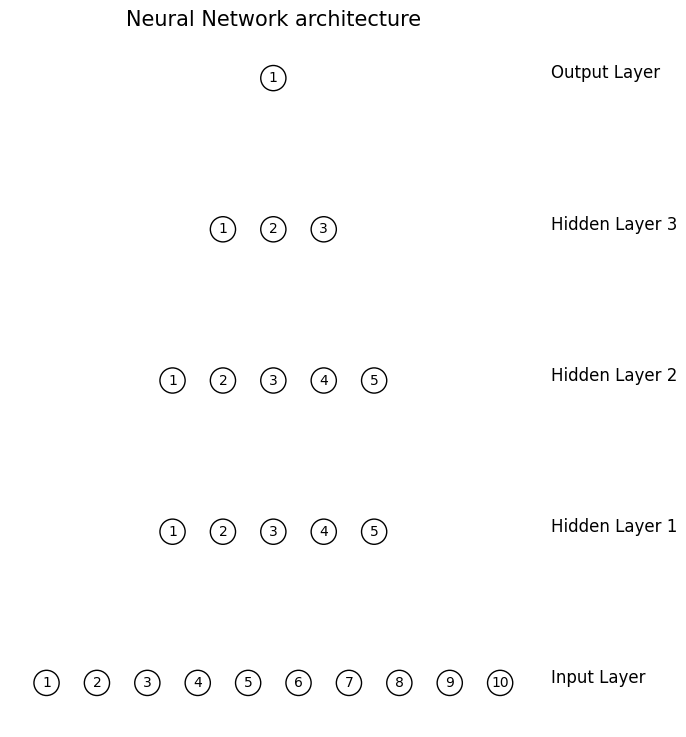

In [ ]:
l = get_model_params(model)
network_structure = layer_sizes_list
network=VisNN.DrawNN(network_structure, l, 0.2, 10)
network.draw()